**The group members:**

    John Clayton BLANC
    Jovany ANTOINE
    Jerry SAINT-LOUIS
    Sanon Mitelson
    
**Course:**

    Machine Learning
    
**Date:**

    06/03/2023
    
**Project description:**
    
    Sign language is the method of communication used to bridge the gap between deaf and dumb people and the rest of the population. But most people do not know sign language, which will make it difficult to communicate between the mute, the deaf and the rest of the population. This project will make communication a little easier because it provides a system to recognize and translate sign language.

# ASL (American Sign Language) Recognition 

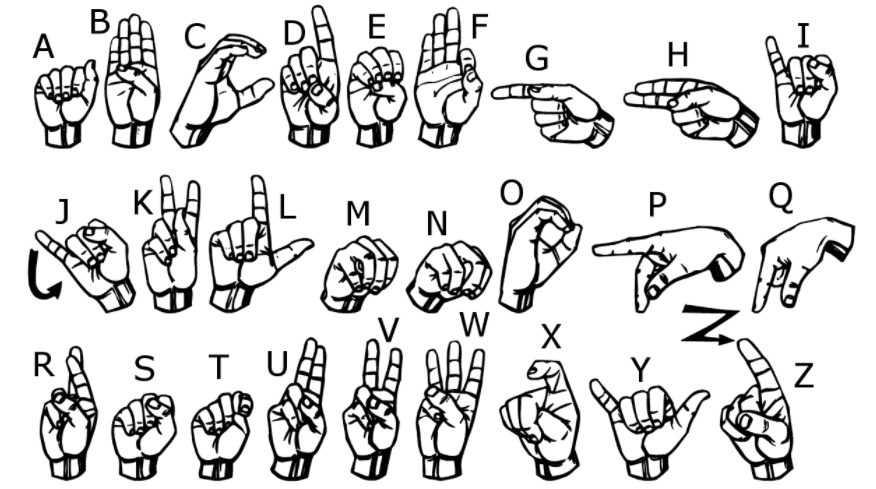

## 1. Dependencies

In [15]:
import tensorflow as tf
from keras import Sequential
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import sys
import cv2
import os

## 2. Load the dataset

**Importing dataset using 90% for training, 9% for validation and 1% for testing**

In [2]:
batch_size=32
img_height=64
img_width=64

base_dir = os.path.join(os.getcwd(), "ASLDataset4/")
train_dir = os.path.join(base_dir, 'train')

# Load TrainSet
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 78300 files for training.


In [3]:
# Load ValidationSet

validation_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.09,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 7830 files for validation.


In [4]:
# Load TestSet

test_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.01,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 870 files for validation.


In [5]:
class_names = train_data.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


## 3. Exploratory Data Analysis (EDA)

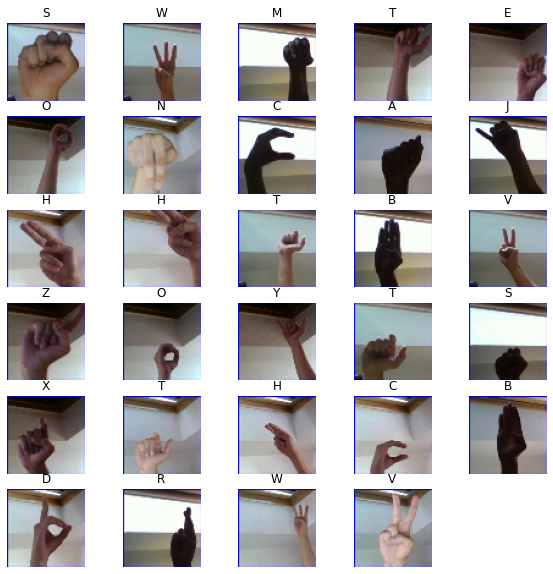

In [6]:
# Plotting sample images

class_names = train_data.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
# Count examples per class
dico = {}

num_examples_per_class = [0] * len(class_names)
for images, labels in train_data:
    for label in labels:
        num_examples_per_class[label.numpy()] += 1

# Print results
for i, class_name in enumerate(class_names):
    dico[class_name] = num_examples_per_class[i]
    print(f"{class_name}: {num_examples_per_class[i]}")

A: 2680
B: 2690
C: 2711
D: 2687
E: 2715
F: 2688
G: 2688
H: 2688
I: 2711
J: 2704
K: 2708
L: 2718
M: 2698
N: 2688
O: 2712
P: 2720
Q: 2672
R: 2683
S: 2689
T: 2709
U: 2692
V: 2706
W: 2708
X: 2704
Y: 2696
Z: 2705
del: 2713
nothing: 2703
space: 2714


In [16]:
fig = px.pie(names=dico.keys(),values=dico.values(),title='Label Information')
fig.update_layout({'title':{"x":0.1}})
fig.show()

## 5. Creating the Model (Using CNN)

 **What exactly is a CNN?**
 
In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

Source: https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/

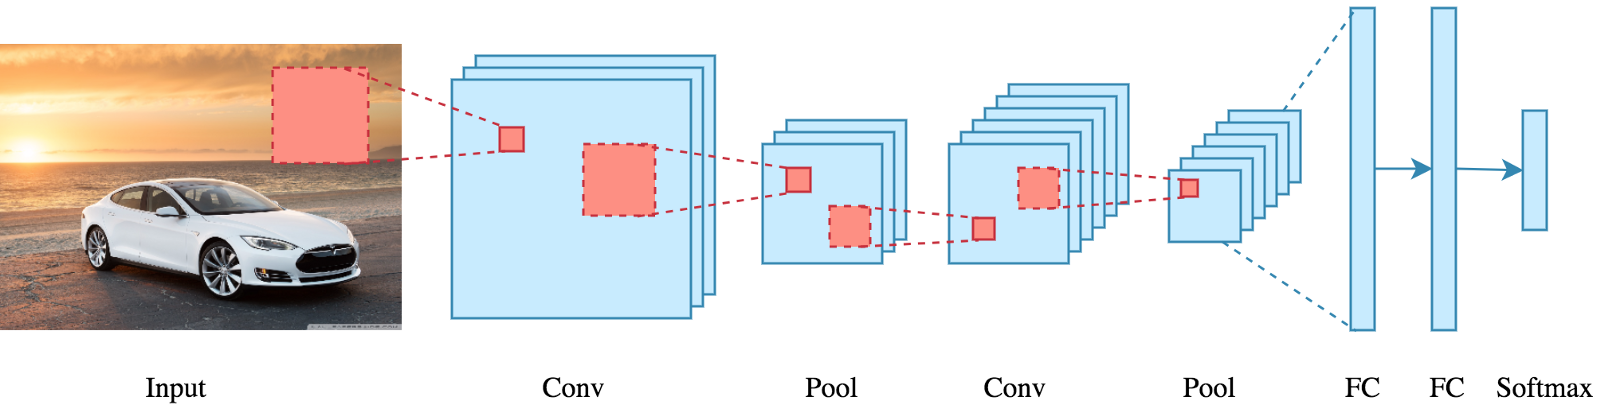

In [8]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

## 6. Training the model

In [10]:
history = model.fit(train_data, batch_size=32,validation_batch_size=32, validation_data=validation_data,epochs=10)

Epoch 1/10
2447/2447 [==============================] - 726s 296ms/step - loss: 0.7779 - accuracy: 0.7531 - val_loss: 0.0882 - val_accuracy: 0.9745
Epoch 2/10
2447/2447 [==============================] - 394s 161ms/step - loss: 0.1342 - accuracy: 0.9540 - val_loss: 0.0305 - val_accuracy: 0.9907
Epoch 3/10
2447/2447 [==============================] - 410s 168ms/step - loss: 0.0862 - accuracy: 0.9703 - val_loss: 0.0478 - val_accuracy: 0.9845
Epoch 4/10
2447/2447 [==============================] - 375s 153ms/step - loss: 0.0609 - accuracy: 0.9796 - val_loss: 0.0240 - val_accuracy: 0.9934
Epoch 5/10
2447/2447 [==============================] - 373s 152ms/step - loss: 0.0526 - accuracy: 0.9828 - val_loss: 0.0101 - val_accuracy: 0.9963
Epoch 6/10
2447/2447 [==============================] - 383s 157ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0097 - val_accuracy: 0.9973
Epoch 7/10
2447/2447 [==============================] - 397s 162ms/step - loss: 0.0390 - accuracy: 0.9876 - val_

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

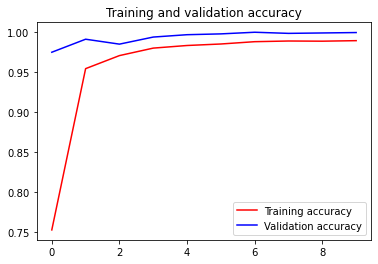

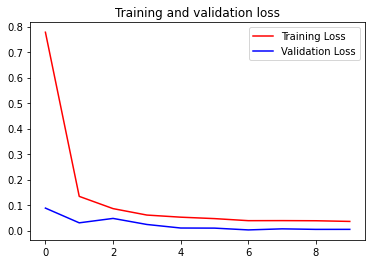

In [12]:
# Plotting accuracy and loss with each epoch

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 7. Testing the model

In [13]:
actual = []
predictions = []
for images, labels in test_data:
    for i in range(0, len(images)):
        image = images[i]
        image = np.expand_dims(image, axis=0)
        result = model.predict(image)
        predictions.append(class_names[np.argmax(result)])
        actual.append(class_names[labels[i].numpy()])

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


**What is a Classification report?**

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

Source: https://thecleverprogrammer.com/2021/07/07/classification-report-in-machine-learning/#:~:text=A%20classification%20report%20is%20a,of%20your%20trained%20classification%20model

In [14]:
print(classification_report(actual, predictions, target_names = class_names))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        30
           B       1.00      1.00      1.00        32
           C       1.00      1.00      1.00        30
           D       1.00      1.00      1.00        39
           E       1.00      1.00      1.00        26
           F       1.00      1.00      1.00        38
           G       1.00      1.00      1.00        34
           H       1.00      1.00      1.00        32
           I       1.00      1.00      1.00        23
           J       1.00      1.00      1.00        22
           K       1.00      1.00      1.00        26
           L       1.00      1.00      1.00        30
           M       1.00      0.97      0.99        34
           N       0.96      1.00      0.98        27
           O       1.00      1.00      1.00        27
           P       1.00      1.00      1.00        26
           Q       1.00      1.00      1.00        38
           R       1.00    

**What is a Confusion Matrix?**

A confusion matrix, as the name suggests, is a matrix of numbers that tell us where a model gets confused. It is a class-wise distribution of the predictive performance of a classification model—that is, the confusion matrix is an organized way of mapping the predictions to the original classes to which the data belong.

Source: https://www.v7labs.com/blog/confusion-matrix-guide

Text(0.5, 114.0, 'Predicted label')

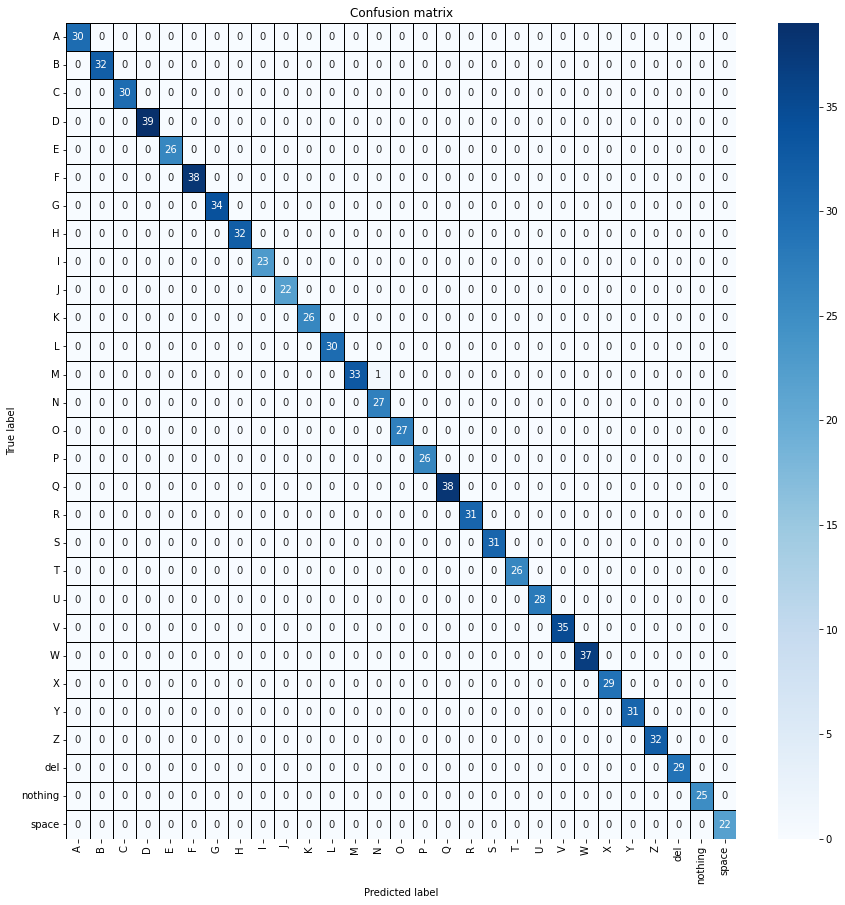

In [15]:
cm = confusion_matrix(actual, predictions)
cm_data_frame = pd.DataFrame(cm , index=class_names , columns=class_names)

plt.figure(figsize = (15,15))
plt.title("Confusion matrix")
sns.heatmap(cm_data_frame, cmap="Blues", linecolor='black' , linewidth=1 , annot=True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 8. Saving the model

In [16]:
model.save('saved_model/model.h5')

## 9. Loading the model

In [10]:
# Recreate the exact same model
loaded_model = tf.keras.models.load_model('saved_model/model.h5')

# Show the model architecture
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0

## 10. Making predictions

In [11]:
def prepare_image(filepath):
    img = cv2.imread(filepath)
    image = cv2.resize(img, (64, 64))
    img_array = np.expand_dims(image, axis=0)
    reshaped_image = np.reshape(img_array, (-1, 64, 64, 3))
    return reshaped_image 

In [12]:
image = prepare_image("ASLDataset4/test/F_test.jpg")

In [13]:
result = loaded_model.predict(image)[0]
pnb = np.argmax(result)
print(class_names[pnb])

1/1 [==============================] - 1s 579ms/step
F
